In [ ]:
#from python.dataframe_builder import df_builder
#import python.query_engine

In [ ]:
#forward_df = df_builder('finishing', 'shooting', 'strength', 'positioning', 'pace', 'heading')

In [ ]:
#forward_df

In [ ]:
#forward_df.to_csv('forward.csv', index=False)

In [ ]:
#shooting_df

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

import sys
from IPython.core import ultratb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
fifa_df = pd.read_csv('write_data/all_players.csv')

In [ ]:
fifa_df.columns = [name.lower().replace(' ', '_') for name in fifa_df.columns]

In [ ]:
gk_df = fifa_df[fifa_df['position'] == 'GK']

In [ ]:
field_df = fifa_df[fifa_df['position'] != 'GK']
field_df.head(20)

In [ ]:
gk_df.head(20)

In [ ]:
fifa_clean_df = fifa_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']).set_index('player_name')

In [ ]:
fifa_clean_df.columns

In [ ]:
fifa_df.loc[fifa_df['position'] == 'GK'].describe()

In [ ]:
fifa_clean_df.columns

In [ ]:
fifa_clean_df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [1]:
# load necessary modules ----
import pandas as pd
import numpy as np
import sys
from IPython.core import ultratb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ensure error messages are color coded using IPython color schema ----
sys.excepthook = ultratb.FormattedTB(mode="Verbose",
                                     color_scheme="Linux",
                                     call_pdb=False)

# load necessary data ----
fifa_df = pd.read_csv("write_data/all_players.csv")

# store relevant columns ----
relevant_columns = ['pace',
        'acceleration', 'sprint_speed', 'dribbling', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'shooting', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties', 'passing',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'defending', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle', 'physicality',
        'jumping', 'stamina', 'strength', 'aggression', 'diving', 'reflexes',
        'handling', 'speed', 'kicking', 'positoning']

field_all_columns = ['pace',
        'acceleration', 'sprint_speed', 'dribbling', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'shooting', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties', 'passing',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'defending', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle', 'physicality',
        'jumping', 'stamina', 'strength', 'aggression']

field_indi_columns = [
        'acceleration', 'sprint_speed', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle',
        'jumping', 'stamina', 'strength', 'aggression']

agg_columns = ['pace', 'shooting', 'defending', 'passing', 'dribbling',
               'physicality']

gk_columns = ['diving', 'reflexes',
        'handling', 'speed', 'kicking', 'positoning']

# clean up data frame to only contain continuous variables ----
fifa_df.columns = [name.lower().replace(" ", "_")
                   for name in fifa_df.columns]

# split data into field players and goalkeepers

gk_df = fifa_df[fifa_df['position'] == 'GK']

field_df = fifa_df[fifa_df['position'] != 'GK']

# clean up data by dropping unnecessary columns ___
field_clean_df = field_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')


gk_clean_df = gk_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot','attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')


field_clean_df = (field_clean_df
           .filter(field_indi_columns)
           .dropna())

gk_clean_df = (gk_clean_df
           .filter(gk_columns)
           .dropna())

//anaconda3/envs/fifa-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
gk_clean_arr = gk_clean_df.to_numpy()

In [379]:
 # instatiate PCA object ----
pca = PCA(n_components=3, random_state=10)

        # fit fifa_df onto pca ----
pca.fit(gk_clean_arr)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [380]:
gk_pca_df = pd.DataFrame({'pc1': np.matmul(gk_clean_arr, pca.components_[0]),
                         'pc2': np.matmul(gk_clean_arr, pca.components_[1])},
                          ndex=gk_clean_df.index)

TypeError: __init__() got an unexpected keyword argument 'ndex'

In [395]:
gk_pca_df_3clust = pd.DataFrame({'pc1': np.matmul(gk_clean_arr, pca.components_[0]),
                         'pc2': np.matmul(gk_clean_arr, pca.components_[1]), 
                         'pc3': np.matmul(gk_clean_arr, pca.components_[2])}, index=gk_clean_df.index)

In [396]:
pca.explained_variance_ratio_

array([0.69331996, 0.19107557, 0.05042054])

In [397]:
pca.components_[0]

array([0.41341768, 0.43554082, 0.39519315, 0.38049867, 0.36139594,
       0.45587951])

In [398]:
gk_clean_df.head()

,diving,reflexes,handling,speed,kicking,positoning
player_name,,,,,,
David De Gea Quintana,90,94,85,57,87,88
Manuel Neuer,92,89,89,55,92,89
Thibaut Courtois,88,89,92,47,75,88
Jan Oblak,87,90,93,44,79,89
Marc-André ter Stegen,88,91,86,39,89,86


In [399]:
from mpl_toolkits.mplot3d import Axes3D

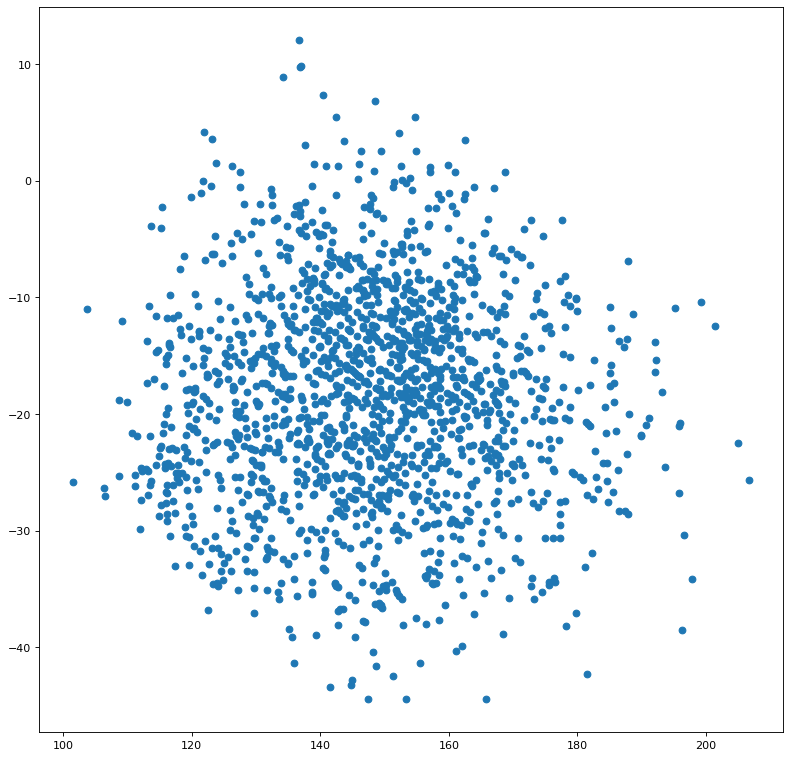

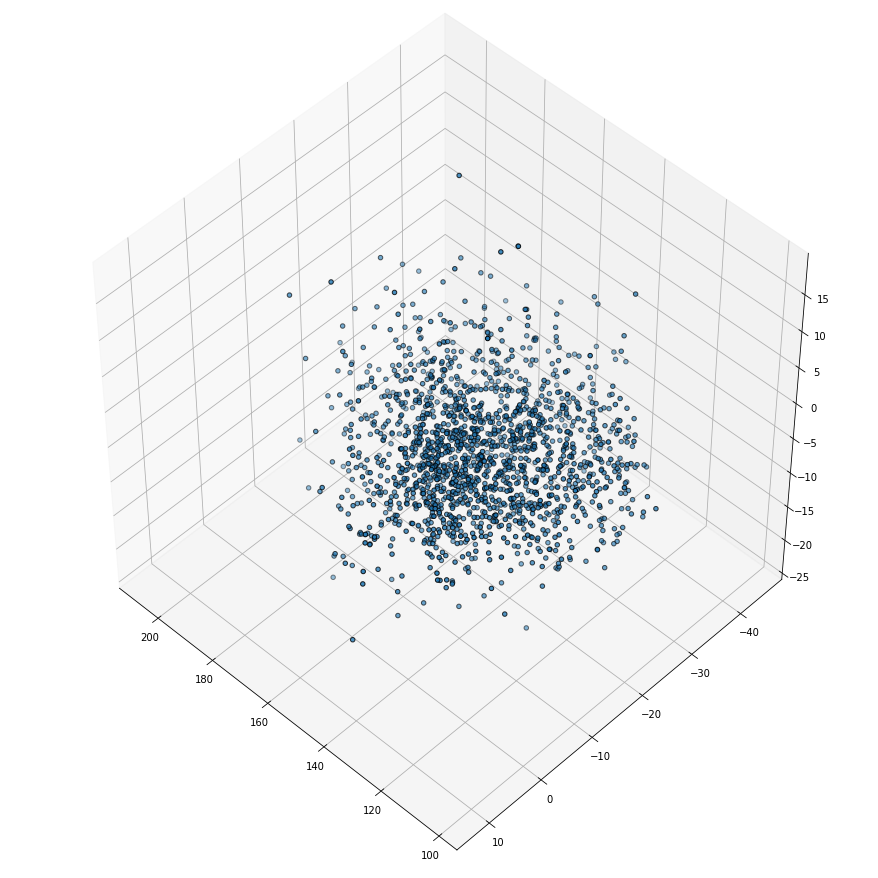

In [400]:
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(gk_pca_df['pc1'],gk_pca_df['pc2']);
ax.scatter(gk_pca_df['pc1'],gk_pca_df['pc2'],gk_pca_df['pc3'], edgecolor='k')
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(gk_pca_df['pc1'],gk_pca_df['pc2'],gk_pca_df['pc3'], edgecolor='k')

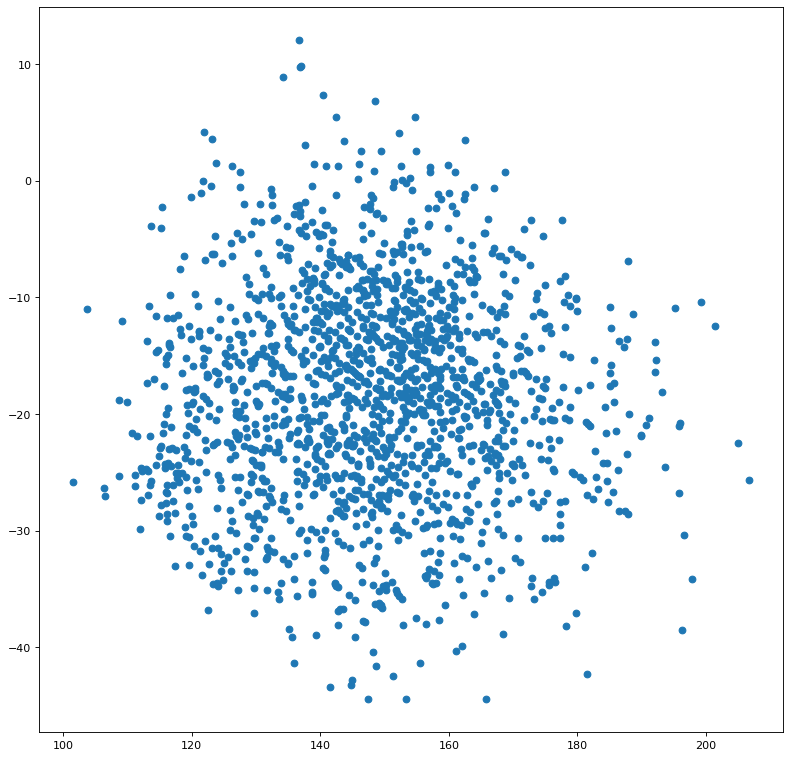

In [401]:

plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(gk_pca_df['pc1'],gk_pca_df['pc2']);

In [402]:
from sklearn.cluster import KMeans # import from sklearn
model_gk = KMeans(n_clusters=3).fit(gk_pca_df)
model_gk.cluster_centers_

array([[148.92019622, -16.56367095,  -5.68684931],
       [126.84848543, -20.20438455,  -5.437533  ],
       [170.86963879, -20.53007517,  -5.57485759]])

In [403]:
cluster_assignments_gk = model_gk.predict(gk_pca_df) # Generate cluster index values for each row in df
cluster_assignments_gk

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

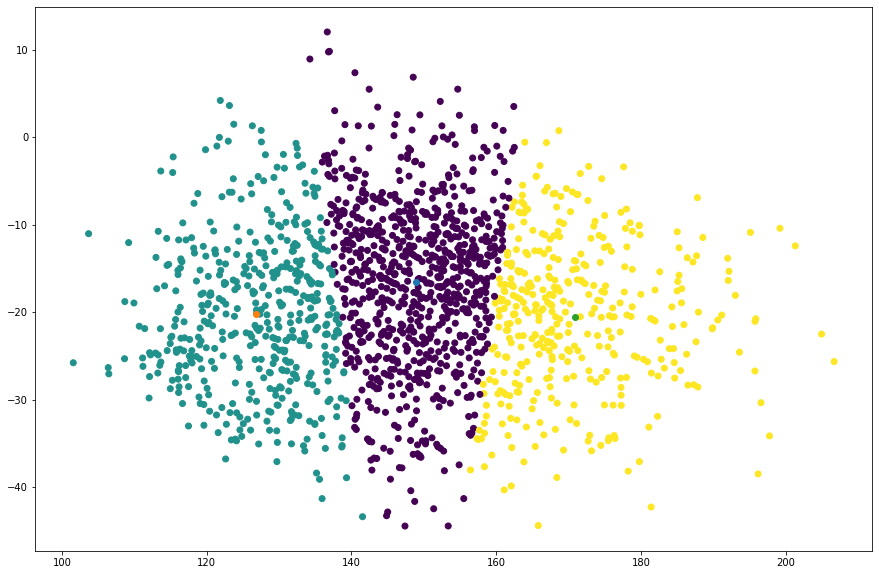

In [404]:
plt.figure(figsize=(15,10))
plt.scatter(gk_pca_df['pc1'], gk_pca_df['pc2'], c=model_gk.labels_)
for i in range(len(model_gk.cluster_centers_)):
    plt.scatter(model_gk.cluster_centers_[i][0], model_gk.cluster_centers_[i][1]);

//anaconda3/envs/fifa-env/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


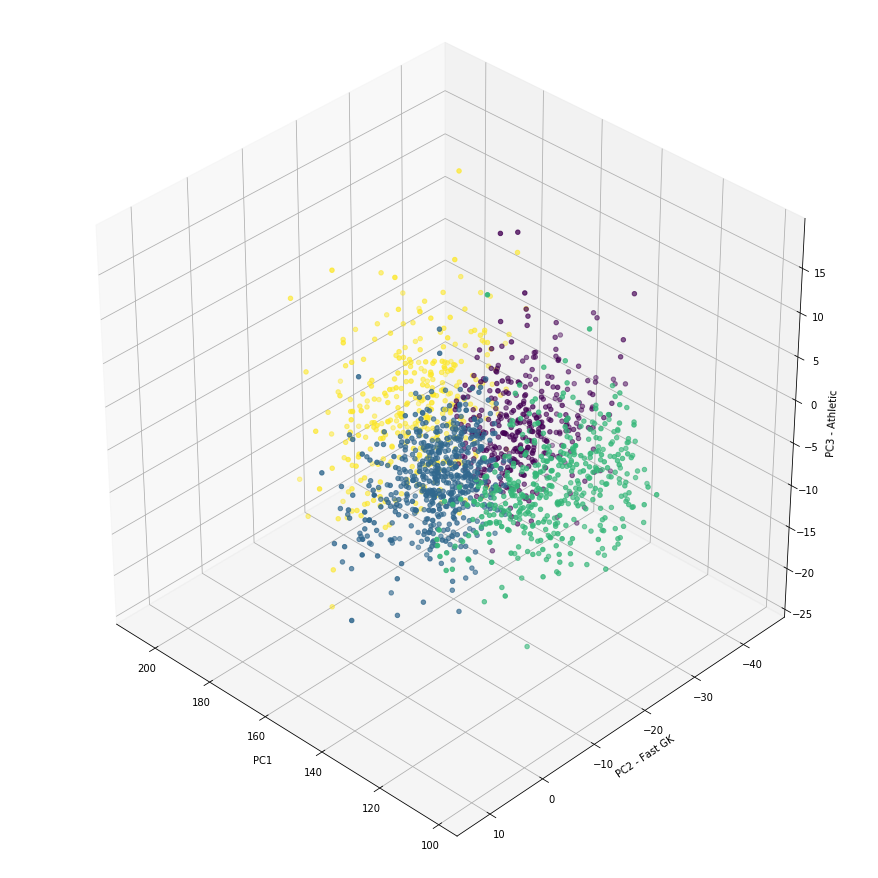

In [415]:
model_gk3 = KMeans(n_clusters=4).fit(gk_pca_df_3clust)
#k_means = KMeans(n_clusters=6) # Must set number of clusters at initialization time!
#k_means.fit(pca_df) # Run the clustering algorithm
model_gk3.cluster_centers_

cluster_assignments_gk3 = model_gk3.predict(gk_pca_df_3clust) # Generate cluster index values for each row in df
cluster_assignments_gk3


fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, elev=35, azim=134)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2 - Fast GK')
ax.set_zlabel('PC3 - Athletic')
ax.scatter(gk_pca_df_3clust['pc1'], gk_pca_df_3clust['pc2'],gk_pca_df_3clust['pc3'], c=model_gk3.labels_)
for i in range(len(model_gk3.cluster_centers_)):
    plt.scatter(model_gk3.cluster_centers_[i][0], model_gk3.cluster_centers_[i][1],
               model_gk3.cluster_centers_[i][2]);

In [410]:
gk_df['classification'] = cluster_assignments_gk3

//anaconda3/envs/fifa-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [411]:
gk_cluster1 = gk_df[gk_df['classification'] == 0]
gk_cluster2 = gk_df[gk_df['classification'] == 1]
gk_cluster3 = gk_df[gk_df['classification'] == 2]
gk_cluster4 = gk_df[gk_df['classification'] == 3]

In [412]:
gk_df['classification'].value_counts()

1    557
2    426
0    374
3    352
Name: classification, dtype: int64

In [423]:
gk_cluster4.head(25)

,unnamed:_0,player_name,overall,club,league,nationality,position,age,height_(cm),weight_(kg),...,rm,lm,cam,cf,rf,lf,rw,lw,st,classification
7,7,David De Gea Quintana,91,Manchester United,Premier League,Spain,GK,27,193,76,...,0,0,0,0,0,0,0,0,0,3
10,10,Manuel Neuer,91,FC Bayern München,Bundesliga,Germany,GK,32,193,92,...,0,0,0,0,0,0,0,0,0,3
11,11,Thibaut Courtois,91,Real Madrid,LaLiga Santander,Belgium,GK,26,199,96,...,0,0,0,0,0,0,0,0,0,3
14,14,Jan Oblak,91,Atlético Madrid,LaLiga Santander,Slovenia,GK,25,188,87,...,0,0,0,0,0,0,0,0,0,3
19,19,Marc-André ter Stegen,90,FC Barcelona,LaLiga Santander,Germany,GK,26,187,85,...,0,0,0,0,0,0,0,0,0,3
32,32,Hugo Lloris,89,Tottenham Hotspur,Premier League,France,GK,31,188,82,...,0,0,0,0,0,0,0,0,0,3
38,38,Gianluigi Buffon,89,Paris Saint-Germain,Ligue 1 Conforama,Italy,GK,40,192,92,...,0,0,0,0,0,0,0,0,0,3
46,46,Keylor Navas,88,Real Madrid,LaLiga Santander,Costa Rica,GK,31,185,80,...,0,0,0,0,0,0,0,0,0,3
52,52,Samir Handanovic,88,Inter,Serie A TIM,Slovenia,GK,34,193,92,...,0,0,0,0,0,0,0,0,0,3
62,62,Ederson Santana de Moraes,87,Manchester City,Premier League,Brazil,GK,25,188,86,...,0,0,0,0,0,0,0,0,0,3


In [43]:
def elbow_test(df):

    X = df
    distortions = []

# Calculate SSE for different K
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state = 10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

# Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title='Elbow curve')
    plt.xlabel('k')
    plt.plot(range(2, 10), distortions)
    plt.grid(True)

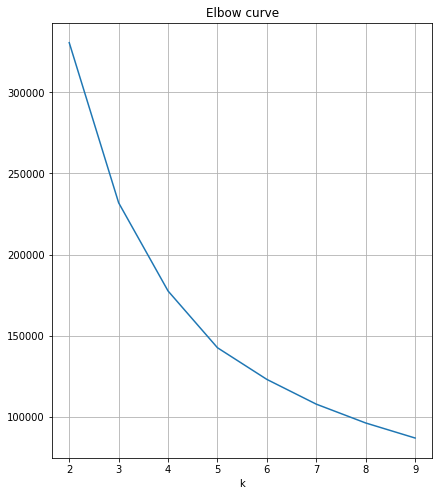

In [44]:
elbow_test(gk_pca_df)

In [106]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(gk_pca_df_3clust)
    silhouette_avg = metrics.silhouette_score(gk_pca_df_3clust, cluster_labels)
    silhouette_plot.append(silhouette_avg)

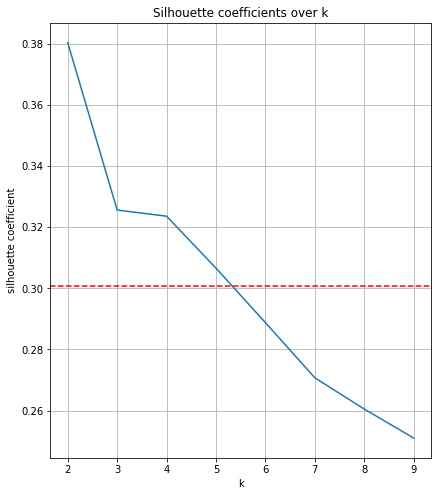

In [107]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [27]:
field_clean_arr = field_clean_df.to_numpy()

In [34]:
 pca = PCA(n_components=2, random_state=10)

        # fit fifa_df onto pca ----
pca.fit(field_clean_arr)

field_pca_df = pd.DataFrame({'pc1': np.matmul(field_clean_arr, pca.components_[0]),
                            'pc2': np.matmul(field_clean_arr, pca.components_[1])},
                           index=field_clean_df.index)

In [30]:
field_pc_df.head()

,pc1,pc2
player_name,,
Lionel Messi,264.156161,291.863413
C. Ronaldo dos Santos Aveiro,247.994613,292.593855
Kevin De Bruyne,212.331170,342.311598
Luis Suárez,222.932452,316.509823
Sergio Ramos García,115.454067,351.880629


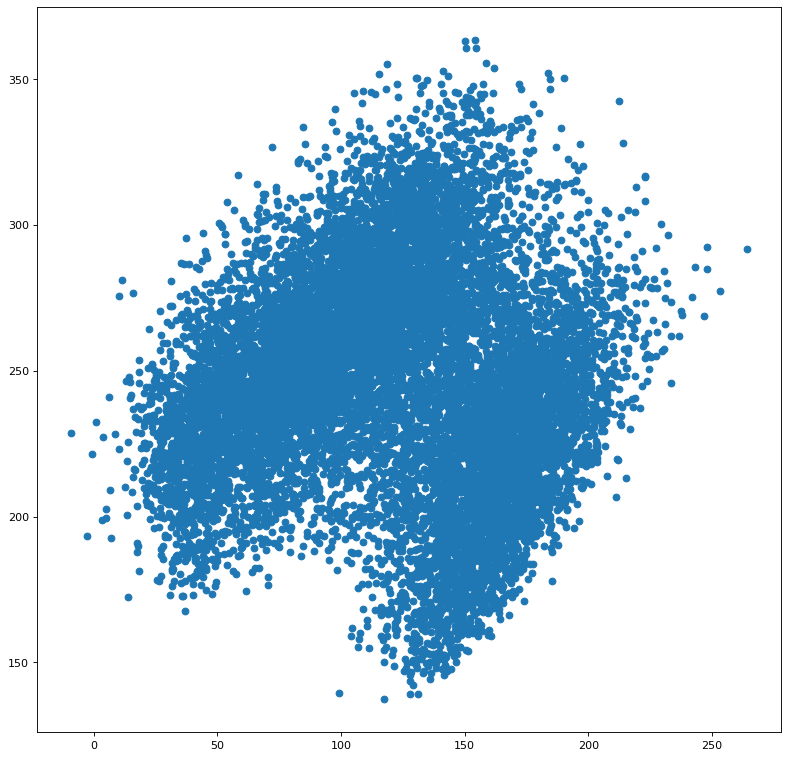

In [36]:
plt.figure(figsize=(12, 12), dpi=80)

plt.scatter(field_pca_df['pc1'],field_pca_df['pc2']);



In [218]:
 pca = PCA(n_components=3, random_state=10)

        # fit fifa_df onto pca ----
pca.fit(field_clean_arr)

field_pca_df_3clust = pd.DataFrame({'pc1': np.matmul(field_clean_arr, pca.components_[0]),
                            'pc2': np.matmul(field_clean_arr, pca.components_[1]),
                            'pc3': np.matmul(field_clean_arr, pca.components_[2])},
                           index=field_clean_df.index)

In [226]:
list(field_clean_df.columns)

['acceleration',
 'sprint_speed',
 'agility',
 'balance',
 'reactions',
 'ball_control',
 'composure',
 'positioning',
 'finishing',
 'shot_power',
 'long_shots',
 'volleys',
 'penalties',
 'vision',
 'crossing',
 'free_kick',
 'short_pass',
 'long_pass',
 'pass_curve',
 'interceptions',
 'heading',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'jumping',
 'stamina',
 'strength',
 'aggression']

In [232]:
list(pca.components_[0])

[0.14046765476212164,
 0.12390172834699642,
 0.17376272935528614,
 0.13187935777701545,
 0.05557633715303372,
 0.1471899220942146,
 0.07862317964813809,
 0.272668977753726,
 0.32470763963390675,
 0.19938856936661206,
 0.27935374682408576,
 0.2729149428620033,
 0.20843507424304808,
 0.19791313532342017,
 0.16443440131650536,
 0.21125552099956216,
 0.08743685571373817,
 0.061634476963202726,
 0.24172873140779833,
 -0.24402041436242053,
 -0.04988860475745086,
 -0.2235709142895454,
 -0.27730758058495275,
 -0.28524585572450045,
 -0.027484870424623085,
 0.02313329313467693,
 -0.09039398468995079,
 -0.10213601334060675]

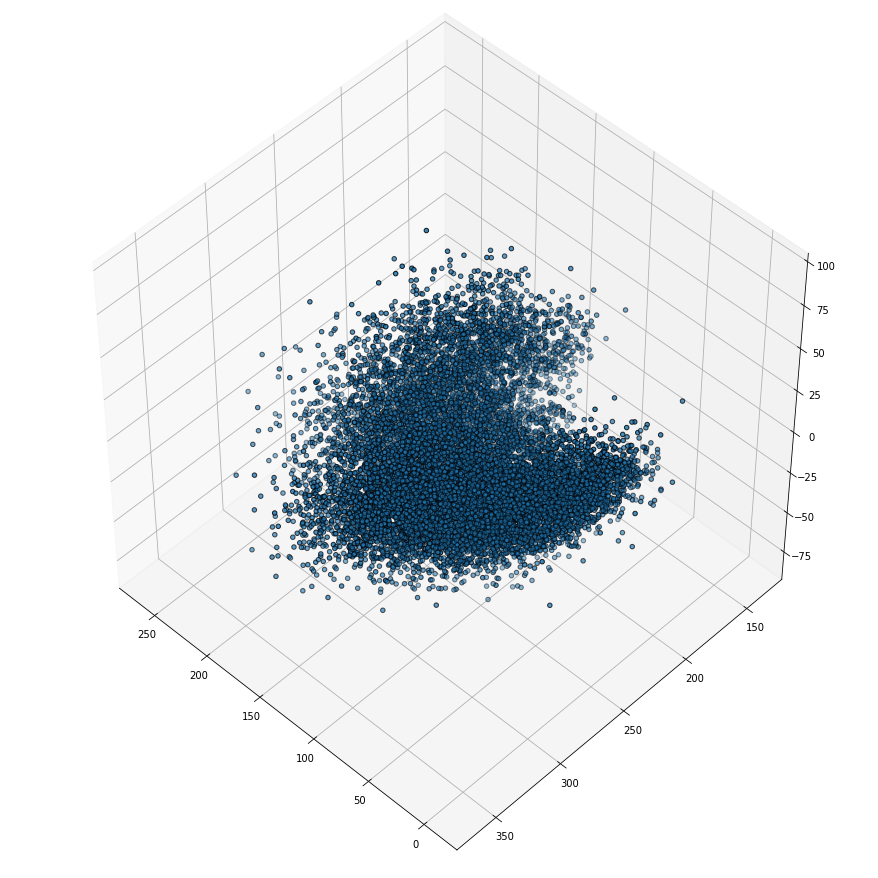

In [82]:
ax.scatter(field_pca_df_3clust['pc1'],field_pca_df_3clust['pc2'],field_pca_df_3clust['pc3'], edgecolor='k')
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, elev=48, azim=154)
ax.scatter(field_pca_df_3clust['pc1'],field_pca_df_3clust['pc2'],field_pca_df_3clust['pc3'], edgecolor='k')

In [217]:
model_field = KMeans(n_clusters=5).fit(field_pca_df_3clust)

model_field.cluster_centers_

array([[ 51.85934419, 229.28359531,  -9.80694062],
       [132.89629421, 297.91395921, -14.99357126],
       [148.69762351, 197.09286418, -12.19961374],
       [177.62509118, 245.71353474, -11.46204228],
       [ 98.66284803, 257.90421032, -23.91547654]])

In [210]:
cluster_assignments_field3 = model_field.predict(field_pca_df_3clust) # Generate cluster index values for each row in df
cluster_assignments_field3

array([1, 1, 2, ..., 4, 0, 0], dtype=int32)

In [274]:
field_df['classification'] = cluster_assignments_field3
field_df.shape

//anaconda3/envs/fifa-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(13688, 72)

In [377]:
strong_defensive_minded = field_df[field_df['classification'] == 0]
technical_finishing_attackers = field_df[field_df['classification'] == 1]
all_rounders_passers = field_df[field_df['classification'] == 2]
def_ball_winners = field_df[field_df['classification'] == 3]
aerial_ball_skillers = field_df[field_df['classification'] == 4]

In [375]:
cluster2.head(50)

,unnamed:_0,player_name,overall,club,league,nationality,position,age,height_(cm),weight_(kg),...,rm,lm,cam,cf,rf,lf,rw,lw,st,classification
0,0,Lionel Messi,95,FC Barcelona,LaLiga Santander,Argentina,CF,31,170,72,...,91,91,94,94,94,94,93,93,90,1
1,1,C. Ronaldo dos Santos Aveiro,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,...,88,88,88,91,91,91,90,90,92,1
3,3,Luis Suárez,92,FC Barcelona,LaLiga Santander,Uruguay,ST,31,182,86,...,86,86,87,89,89,89,87,87,88,1
6,6,Neymar da Silva Santos Jr.,92,Paris Saint-Germain,Ligue 1 Conforama,Brazil,LW,26,175,68,...,89,89,90,90,90,90,90,90,84,1
8,8,Eden Hazard,91,Chelsea,Premier League,Belgium,LW,27,173,74,...,89,89,90,89,89,89,89,89,84,1
9,9,Robert Lewandowski,91,FC Bayern München,Bundesliga,Poland,ST,30,184,80,...,82,82,85,87,87,87,84,84,88,1
16,16,Paulo Dybala,90,Juventus,Serie A TIM,Argentina,CAM,24,177,75,...,87,87,88,87,87,87,88,88,84,1
17,17,Sergio Agüero,90,Manchester City,Premier League,Argentina,ST,30,173,70,...,85,85,86,88,88,88,87,87,87,1
18,18,David Josué Jimenez Silva,90,Manchester City,Premier League,Spain,CAM,32,173,67,...,85,85,87,84,84,84,85,85,77,1
21,21,Harry Kane,90,Tottenham Hotspur,Premier League,England,ST,25,188,89,...,83,83,84,85,85,85,83,83,87,1


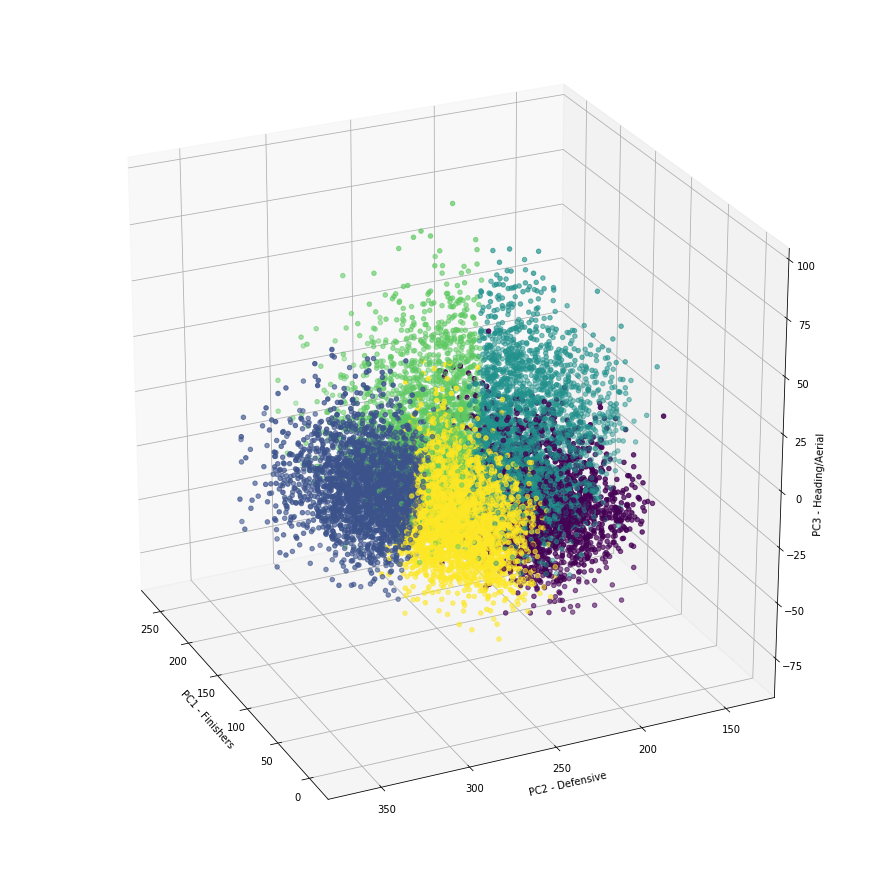

In [242]:
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, elev=25, azim=155)
ax.set_xlabel('PC1 - Finishers')
ax.set_ylabel('PC2 - Defensive')
ax.set_zlabel('PC3 - Heading/Aerial')
ax.scatter(field_pca_df_3clust['pc1'], field_pca_df_3clust['pc2'],field_pca_df_3clust['pc3'],
           c=model_field.labels_)

#plt.scatter(field_pca_df['pc1'], field_pca_df['pc2'], c=model_field.labels_)

for i in range(len(model_field.cluster_centers_)):
    plt.scatter(model_field.cluster_centers_[i][0], model_field.cluster_centers_[i][1],
                model_field.cluster_centers_[i][2]);
#for i in range(len(model_field.cluster_centers_)):
   # plt.scatter(model_field.cluster_centers_[i][0], model_field.cluster_centers_[i][1]);

In [364]:
positions = field_df['position'].to_numpy()

set(positions)

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

In [346]:
model_field.labels_

array([3, 3, 1, ..., 2, 0, 0], dtype=int32)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not ['CF' 'ST' 'CAM' ... 'ST' 'RB' 'CM'].

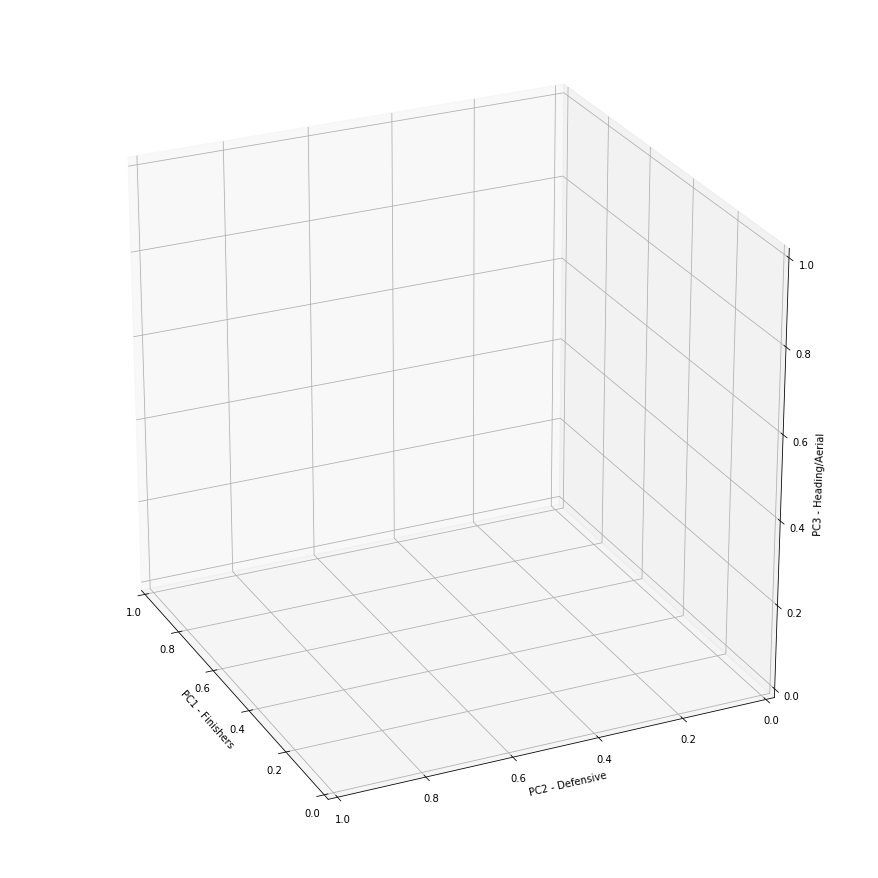

In [350]:
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, elev=25, azim=155)
ax.set_xlabel('PC1 - Finishers')
ax.set_ylabel('PC2 - Defensive')
ax.set_zlabel('PC3 - Heading/Aerial')
ax.scatter(field_pca_df_3clust['pc1'], field_pca_df_3clust['pc2'],field_pca_df_3clust['pc3'],
           c=positions)

#plt.scatter(field_pca_df['pc1'], field_pca_df['pc2'], c=model_field.labels_)

for i in range(len(model_field.cluster_centers_)):
    plt.scatter(model_field.cluster_centers_[i][0], model_field.cluster_centers_[i][1],
                model_field.cluster_centers_[i][2]);

In [93]:
from sklearn import metrics.

In [243]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(field_pca_df_3clust)
    silhouette_avg = metrics.silhouette_score(field_pca_df_3clust, cluster_labels)
    silhouette_plot.append(silhouette_avg)

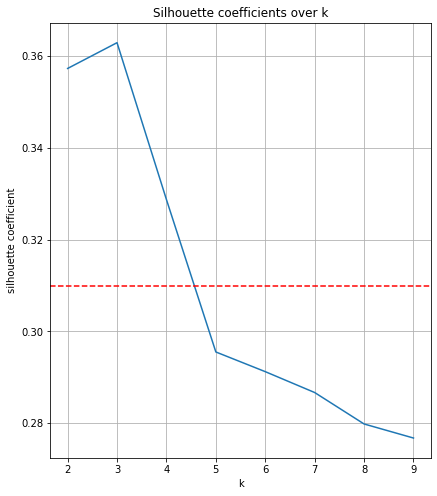

In [244]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [215]:
pca.explained_variance_ratio_


array([0.69331996, 0.19107557, 0.05042054])

In [50]:

model_field = KMeans(n_clusters=5).fit(field_pca_df)
#k_means = KMeans(n_clusters=6) # Must set number of clusters at initialization time!
#k_means.fit(pca_df) # Run the clustering algorithm
model_field.cluster_centers_

array([[134.87793809, 298.02942083],
       [ 97.70841052, 261.16663374],
       [148.06296674, 197.43310467],
       [ 53.2161893 , 227.63730857],
       [177.27215601, 245.2778193 ]])

In [51]:
cluster_assignments_field = model_field.predict(field_pca_df) # Generate cluster index values for each row in df
cluster_assignments_field

array([4, 4, 0, ..., 2, 3, 3], dtype=int32)

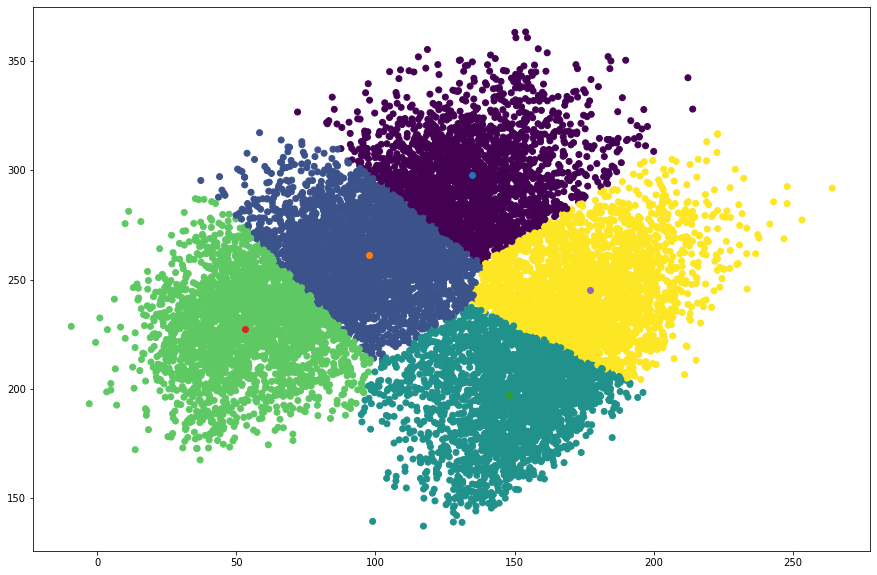

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(field_pca_df['pc1'], field_pca_df['pc2'], c=model_field.labels_)
for i in range(len(model_field.cluster_centers_)):
    plt.scatter(model_field.cluster_centers_[i][0], model_field.cluster_centers_[i][1]);

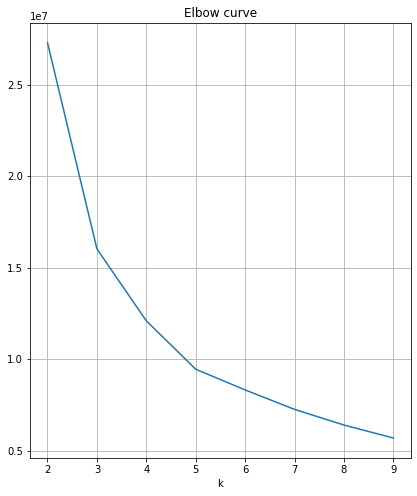

In [49]:
elbow_test(field_pca_df)

In [437]:

import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [438]:
def bag_model(df, target, depth, samples):

    X = df.drop([target], axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=1)

    rt = DecisionTreeRegressor(random_state=1, max_depth=depth)

    rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=1)

    bag = BaggingRegressor(n_estimators=100,
                       max_features=X.shape[1],
                       max_samples=samples,
                       random_state=1)

    rt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    bag.fit(X_train, y_train)

    return f"""Decision Tree Score = {rt.score(X_test, y_test)}, ---
    Bagging Score = {bag.score(X_test, y_test)}, --- Random Forest Score
    {rf.score(X_test, y_test)}"""

In [439]:
field_clean_df = field_df.drop(columns=['unnamed:_0', 'club',
                                     'league','nationality', 'position',
                                      'age','preferred_foot',
                                      'attacking_workrate',
                                      'defensive_workrate',
                                      'skill_moves', 'weak_foot']
                                      ).set_index('player_name')
field_clean_indi_columns = [
        'acceleration', 'sprint_speed', 'agility', 'balance',
        'reactions', 'ball_control', 'composure', 'positioning',
        'finishing','shot_power', 'long_shots', 'volleys', 'penalties',
        'vision', 'crossing', 'free_kick', 'short_pass', 'long_pass',
        'pass_curve', 'interceptions', 'heading', 'marking', 
        'standing_tackle', 'sliding_tackle',
        'jumping', 'stamina', 'strength', 'aggression', 'classification']
field_clean_df = (field_clean_df
           .filter(field_clean_indi_columns)
           .dropna())

In [440]:
field_clean_df.columns

Index(['acceleration', 'sprint_speed', 'agility', 'balance', 'reactions',
       'ball_control', 'composure', 'positioning', 'finishing', 'shot_power',
       'long_shots', 'volleys', 'penalties', 'vision', 'crossing', 'free_kick',
       'short_pass', 'long_pass', 'pass_curve', 'interceptions', 'heading',
       'marking', 'standing_tackle', 'sliding_tackle', 'jumping', 'stamina',
       'strength', 'aggression', 'classification'],
      dtype='object')

In [441]:
bag_model(field_clean_df, 'classification', 200, 300)

'Decision Tree Score = 0.5402198796616193, ---\n    Bagging Score = 0.7693557613809529, --- Random Forest Score\n    0.8358903733138132'

In [442]:
X = field_clean_df.drop(['classification'], axis=1)
y = field_clean_df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=1)

In [443]:
rf = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=1)

In [444]:
X_train.head()

,acceleration,sprint_speed,agility,balance,reactions,ball_control,composure,positioning,finishing,shot_power,...,pass_curve,interceptions,heading,marking,standing_tackle,sliding_tackle,jumping,stamina,strength,aggression
player_name,,,,,,,,,,,,,,,,,,,,,
Lee Evans,54,52,61,64,58,69,65,58,54,71,...,48,63,47,61,59,58,55,72,71,67
Abdul Khalili,69,72,67,74,69,74,68,58,66,70,...,70,70,51,71,63,54,58,77,70,63
Ashley Eastham,59,39,64,44,59,45,55,15,15,35,...,31,53,61,56,64,69,80,74,81,64
Aaron Cresswell,74,72,74,85,73,74,71,60,53,71,...,76,75,64,72,78,79,91,74,62,73
Matías Navarrete,59,64,55,66,62,55,57,35,34,60,...,33,62,70,74,72,69,73,70,72,75


In [445]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [446]:
rf.score(X_test, y_test)

0.9427235534774986

In [447]:
y_pred = rf.fit(X_train, y_train).predict(X_test)

In [458]:
'strong_defensive_minded', 'technical_finishing_attackers', 'all_rounder_playmakers',
'def_ball_winners', 'aerial_ball_skillers'

('def_ball_winners', 'aerial_ball_skillers')

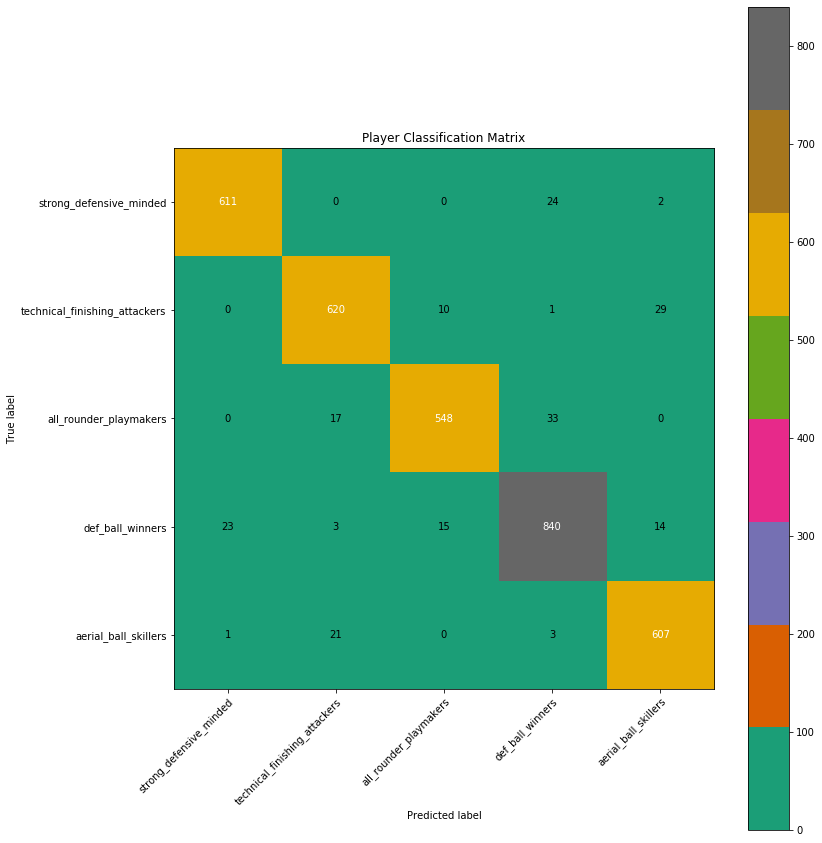

In [465]:
title = 'Player Classification Matrix'
classes = ['strong_defensive_minded', 
           'technical_finishing_attackers',
           'all_rounder_playmakers',
           'def_ball_winners',
          'aerial_ball_skillers']
cmap = plt.cm.Dark2
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))

im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
      yticks=np.arange(cm.shape[0]),
      xticklabels=classes,
      yticklabels=classes,
      title=title,
      ylabel='True label',
      xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.plot();

In [461]:
X_train.shape

(10266, 28)

In [457]:
X_test.shape

(3422, 28)

In [468]:
rf.predict(X_train.head(10))

array([2, 2, 0, 2, 0, 4, 3, 3, 4, 3], dtype=int32)